In [101]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [109]:
run = "81"

## Sequence of requests

- Optimal seq taken from the `/simulations/reserv_seq/*/*algo2.txt`
- Memory division seq taken from `figure 7` in the paper

In [110]:
request = [114, 126, 133]
memory_req = [30, 110]

## Read the memory footprint information for VU and Inria

- In files `run*.mem` for VU and `run*_inria.mem`
- For VU taking one snapshot every 2 seconds (it takes 1.3s in average to take the snapshot) so total time for VU = len(snapshots) * 3.3
- For Inria snapshot taken every 2 seconds, so total time for VU = len(snapshots) * 2

In [111]:
inf = open("SLANT_logs/run%s.mem" %(run), "r")
mem_footprint = []
for line in inf:
    line = line.split('\n')[0]
    if line == "":
        continue
    mem = float(line.strip('MGB'))
    # transform memory into GB
    if 'M' in line:
        mem /= 1024
    mem_footprint.append(mem)

print(len(mem_footprint), "timestept. Total execution:", (len(mem_footprint)-1)*3.3/60, "min")

3886 timestept. Total execution: 213.675 min


In [112]:
inf = open("SLANT_logs/run%s_inria.mem" %(run), "r")
#inf = open("SLANT_logs/slant.mem.log", "r")
inria_footprint = []
for line in inf:
    line = line.split('\n')[0].split(",")
    if len(line) != 2:
        continue
    mem = (int(line[0]), int(line[1])/(1024*1024))
    inria_footprint.append(mem)

print(len(inria_footprint), "timestept. Total execution:", inria_footprint[-1][0]/60, "min")

4148 timestept. Total execution: 138.23333333333332 min


## Plot the memory usage throughout the execution of the application

- Vertical lines for reservation ends
- For VU reservations we use the ones given for Inria scaled by a factor

In [113]:
# general scale for the entire walltime
scale_factor = 1.6
# factor for scaling each phase
memory_factor = [1.1, 1.6, 1.2]

182.4 213.73
201.60000000000002 213.73
212.8 213.73
33.0 213.73
176.0 213.73


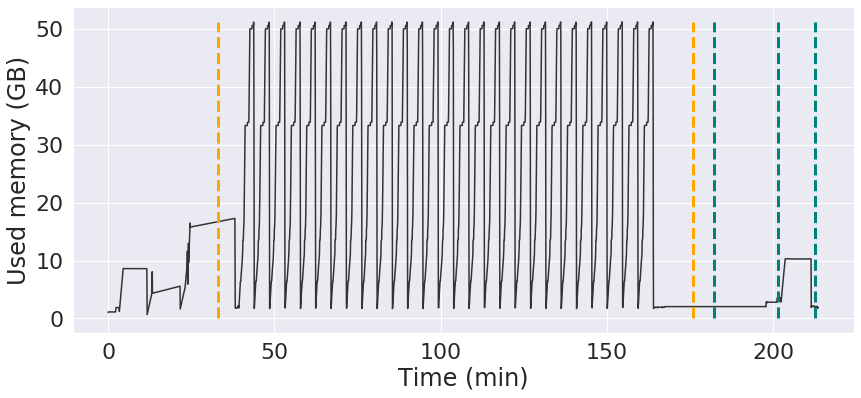

In [114]:
# Plot VU performance
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=2)

# plot the memory usage
plt.plot([3.3*i/60 for i in range(len(mem_footprint))], mem_footprint, color="#333333")

# plot the vertical lines with requests
for i in request:
    print(i * scale_factor, len(mem_footprint) * 3.3 / 60)
    if i * scale_factor > len(mem_footprint) * 3.3 / 60:
        break
    plt.plot([i * scale_factor, i * scale_factor],
             [0, max(mem_footprint)], '--', linewidth=3,
             color="teal")

# plot the vertical lines to divide memory
idx = 0
for i in memory_req:
    print(i * memory_factor[idx], len(mem_footprint) * 3.3 / 60)
    if i * memory_factor[idx] > len(mem_footprint) * 3.3 / 60:
        break
    plt.plot([i * memory_factor[idx], i * memory_factor[idx]],
             [0, max(mem_footprint)], '--', linewidth=3,
             color="orange")
    if idx < len(memory_factor)-1:
        idx += 1

ax.set_ylabel('Used memory (GB)')
ax.set_xlabel('Time (min)')
plt.savefig("SLANT_logs/memusage_%s.png" %(run))
plt.show()

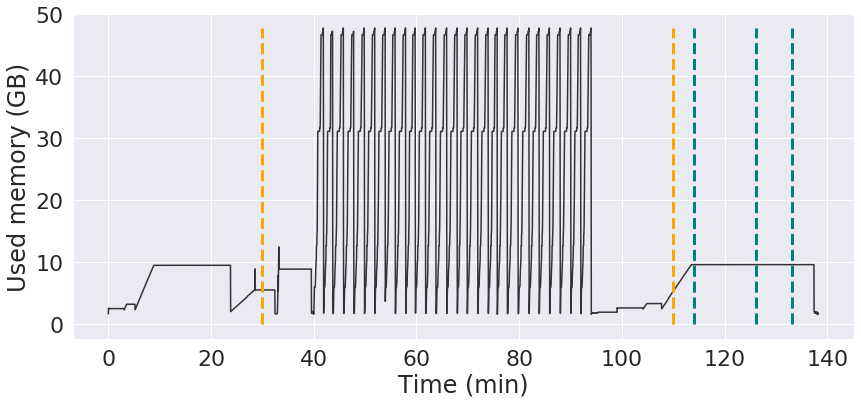

In [115]:
# Plot Inria performance
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=2)

# plot the memory usage
plt.plot([i[0]/60 for i in inria_footprint], [i[1] for i in inria_footprint], color="#333333")


# plot the vertical lines with requests
for i in request:
    if i > inria_footprint[-1][0] / 60:
        break
    plt.plot([i, i], [0, max([i[1] for i in inria_footprint])],
             '--', linewidth=3, color="teal")

# plot the vertical lines to divide memory
for i in memory_req:
    if i > inria_footprint[-1][0] / 60:
        break
    plt.plot([i, i], [0, max([i[1] for i in inria_footprint])],
             '--', linewidth=3, color="orange")

ax.set_ylabel('Used memory (GB)')
ax.set_xlabel('Time (min)')
plt.savefig("SLANT_logs/memusage_%s_inria.png" %(run))
plt.show()